# **Stat-O-Matic Baseball** 

## **Exploring Major League Baseball data from 1990 to 2021**

*By Zachary Clarke*

*The data set that I will be using in this notebook was retrived from Sean Lahman's baseball Database - https://www.seanlahman.com/baseball-archive/statistics/*

## Imports

First I imported the libraries we would be working with the most in the notebook

In [9]:
#pandas allows me to work with csv files  
import pandas as pd
#pandasql allows me to use SQL querys inside my juptyer notebook 
import pandasql as psql
from pandasql import sqldf
#The lambda function allows me to write more efficent python coded sql querys 
sql = lambda q: sqldf(q, globals())
# Seaborn and matplotlib allows me to create visulization inside the notebook 
import seaborn as sns
import matplotlib.pyplot as plt



In [35]:
#imported the csv file that I will be working with. 
teams = pd.read_csv("data/Teams.csv") 
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


## Cleaning

In [24]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2985 non-null   int64  
 1   lgID            2935 non-null   object 
 2   teamID          2985 non-null   object 
 3   franchID        2985 non-null   object 
 4   divID           1468 non-null   object 
 5   Rank            2985 non-null   int64  
 6   G               2985 non-null   int64  
 7   Ghome           2586 non-null   float64
 8   W               2985 non-null   int64  
 9   L               2985 non-null   int64  
 10  DivWin          1440 non-null   object 
 11  WCWin           804 non-null    object 
 12  LgWin           2957 non-null   object 
 13  WSWin           2628 non-null   object 
 14  R               2985 non-null   int64  
 15  AB              2985 non-null   int64  
 16  H               2985 non-null   int64  
 17  2B              2985 non-null   i

In [25]:
teams.isnull().sum()

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   1
SO                  16
SB                 126
CS                 832
HBP               1158
SF                1541
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                34
attendance         279
BPF        

In [26]:
teams.duplicated().sum()

0

In [36]:
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [37]:
teams = teams.drop(columns = ["Rank", "Ghome", "park", "attendance", "BPF", "PPF", "teamIDBR", "teamIDlahman45", "teamIDretro", "WCWin", "LgWin", "2B", "3B"])

In [38]:
teams = sql("SELECT * FROM teams where yearID between 1990 and 2021")
teams

,yearID,lgID,teamID,franchID,divID,G,W,L,DivWin,WSWin,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name
0,1990,NL,ATL,ATL,W,162,65,97,N,N,...,30,4289,1527,128,579,938,158,133,0.974,Atlanta Braves
1,1990,AL,BAL,BAL,E,161,76,85,N,N,...,43,4306,1445,161,537,776,93,151,0.985,Baltimore Orioles
2,1990,AL,BOS,BOS,E,162,88,74,Y,N,...,44,4326,1439,92,519,997,123,154,0.980,Boston Red Sox
3,1990,AL,CAL,ANA,W,162,80,82,N,N,...,42,4362,1482,106,544,944,142,186,0.978,California Angels
4,1990,AL,CHA,CHW,W,162,94,68,N,N,...,68,4348,1313,106,548,914,124,169,0.980,Chicago White Sox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,2021,NL,SLN,STL,C,162,90,72,N,N,...,50,4251,1234,152,608,1225,84,137,0.986,St. Louis Cardinals
934,2021,AL,TBA,TBD,E,162,100,62,Y,N,...,42,4367,1264,184,436,1478,80,130,0.986,Tampa Bay Rays
935,2021,AL,TEX,TEX,W,162,60,102,N,N,...,31,4273,1402,232,513,1239,83,146,0.986,Texas Rangers
936,2021,AL,TOR,TOR,E,162,91,71,N,N,...,34,4216,1257,209,473,1468,90,122,0.984,Toronto Blue Jays


## Exploration

In [43]:
teams.describe()

,yearID,G,W,L,R,AB,H,HR,BB,SO,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,...,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,2006.039906,161.957746,80.965962,80.965962,743.057512,5535.174883,1439.949531,168.996479,530.217136,1128.136150,...,9.179577,41.035211,4335.773474,1439.949531,168.996479,530.217136,1128.136150,104.753521,147.583333,0.982766
std,8.728887,0.336706,11.641734,11.606656,85.457064,82.624524,86.052677,38.909654,72.689695,174.219604,...,3.931183,7.365635,43.026995,95.814774,31.939333,66.590165,173.883216,18.809461,18.813110,0.002964
min,1990.000000,160.000000,43.000000,46.000000,513.000000,5210.000000,1199.000000,68.000000,363.000000,741.000000,...,0.000000,22.000000,4138.000000,1107.000000,82.000000,348.000000,693.000000,54.000000,94.000000,0.972000
25%,1999.000000,162.000000,72.000000,72.000000,684.000000,5483.000000,1379.000000,141.750000,476.000000,1003.000000,...,6.000000,36.000000,4309.000000,1374.750000,148.000000,484.000000,997.000000,91.000000,135.000000,0.981000
50%,2006.000000,162.000000,81.000000,81.000000,737.000000,5533.500000,1436.000000,166.000000,527.000000,1104.500000,...,9.000000,41.000000,4335.000000,1439.000000,168.000000,528.000000,1110.500000,103.000000,147.000000,0.983000
75%,2013.000000,162.000000,90.000000,89.000000,798.250000,5592.250000,1497.250000,197.000000,578.000000,1244.250000,...,12.000000,46.000000,4364.000000,1505.000000,190.000000,575.000000,1234.500000,117.000000,160.000000,0.985000
max,2021.000000,163.000000,116.000000,119.000000,1009.000000,5781.000000,1684.000000,307.000000,775.000000,1596.000000,...,24.000000,68.000000,4485.000000,1734.000000,305.000000,784.000000,1687.000000,174.000000,204.000000,0.991000


In [ ]:
#team with the best single season wins
df_1 = teams.loc[teams['W']== teams['W'].max()]
sql("select yearID, lgID, franchID, W, L, R, RA FROM df_1")

,yearID,lgID,franchID,W,L,R,RA
0,2001,AL,SEA,116,46,927,627


In [ ]:
ADD IMAGE 

In [44]:
#Worst Season
df_2 = teams.loc[teams['L']== teams['L'].max()]
sql("select yearID, lgID, franchID, W, L, R, RA FROM df_2")

,yearID,lgID,franchID,W,L,R,RA
0,2003,AL,DET,43,119,591,928


In [ ]:
ADD IMAGE 

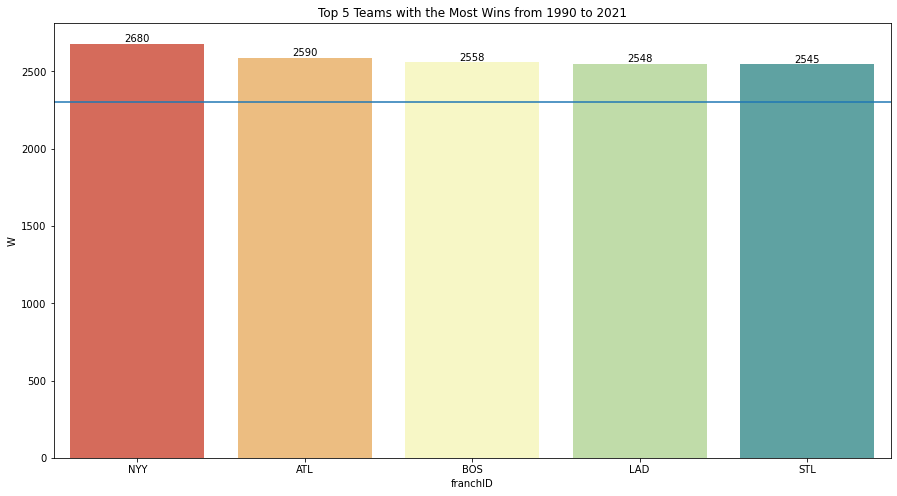

In [45]:
#Top teams with the most wins-- Bar Graph 

TeamWinsPivot = pd.pivot_table(data = teams, values = "W", index = teams["franchID"], aggfunc =  'sum')
TeamWins = TeamWinsPivot.reset_index()
plt.figure(figsize=(15,8))
graph = sns.barplot(data = TeamWins.sort_values('W', ascending=False).head(5), x= "franchID", y='W', palette='Spectral')
plt.title('Top 5 Teams with the Most Wins from 1990 to 2021')
graph.axhline(TeamWins["W"].mean())
graph.bar_label(graph.containers[0])
plt.show()

In [67]:
print(round(TeamWins["W"].mean(),2), "is the mean line")

2299.43 is the mean line


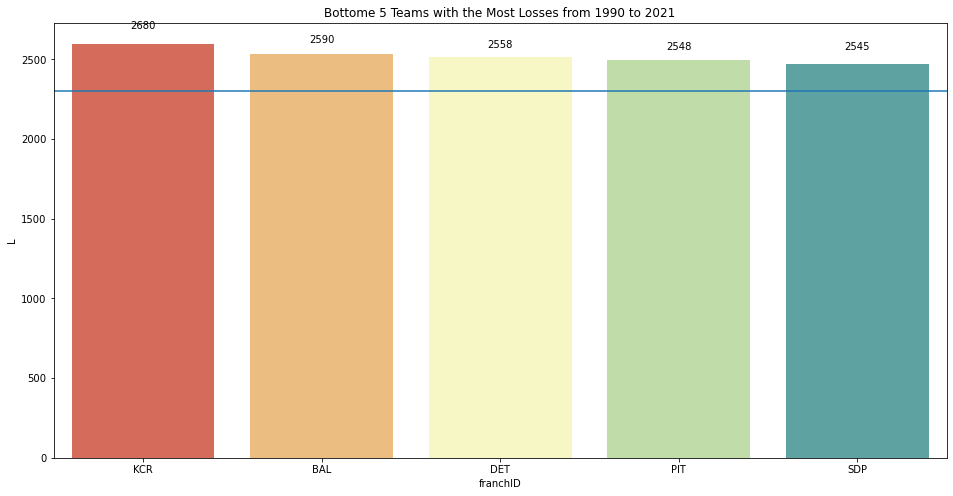

In [50]:
#Bottom 5 teams with the most single season losses -- Bar Graph 

TeamLossesPivot = pd.pivot_table(data = teams, values = "L", index = teams["franchID"], aggfunc =  'sum')
TeamLosses = TeamLossesPivot.reset_index()
#TeamWinsPivot.sort_values('W', ascending=False).head(5)
plt.figure(figsize=(16,8))
graph_2 = sns.barplot(data = TeamLosses.sort_values('L', ascending=False).head(5), x= "franchID", y='L', palette='Spectral')
plt.title('Bottome 5 Teams with the Most Losses from 1990 to 2021')
graph_2.axhline(TeamLosses["L"].mean())
graph_2.bar_label(graph.containers[0])
plt.show()

In [68]:
print(round(TeamLosses["L"].mean(),2), "is the mean line") 

2299.43 is the mean line


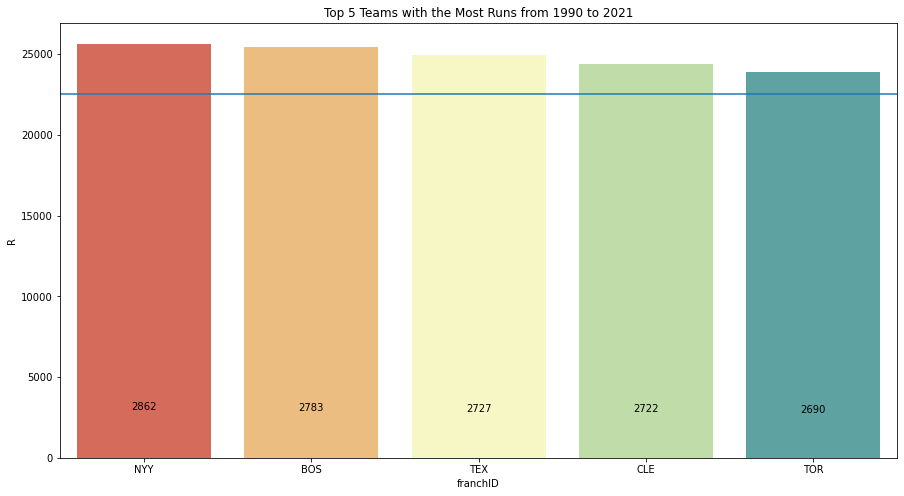

In [ ]:
#best offensive seasons 5 
#create a group by that shows total runs by franchise 


TeamRuns = pd.pivot_table(data = teams, values = "R", index = teams["franchID"], aggfunc =  'sum')
TeamRuns = TeamRuns.reset_index()
#TeamWinsPivot.sort_values('W', ascending=False).head(5)
plt.figure(figsize=(15,8))
graph_3= sns.barplot(data = TeamRuns.sort_values('R', ascending=False).head(5), x= "franchID", y='R', palette='Spectral')
plt.title('Top 5 Teams with the Most Runs from 1990 to 2021')
graph_3.axhline(TeamRuns["R"].mean())
graph_3.bar_label(graph.containers[0])
plt.show()

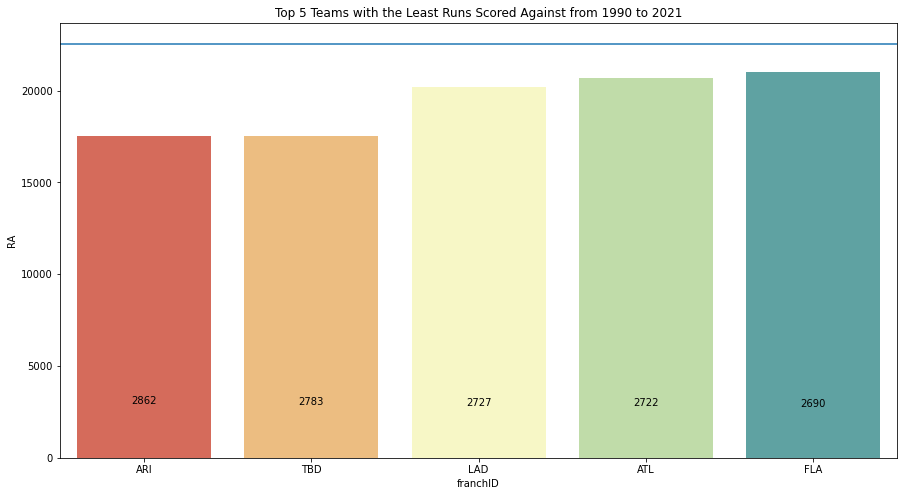

In [ ]:
#best deffensive / pitching season - 5

TeamRunsAgainst = pd.pivot_table(data = teams, values = "RA", index = teams["franchID"], aggfunc =  'sum')
TeamRunsAgainst = TeamRunsAgainst.reset_index()
#TeamWinsPivot.sort_values('W', ascending=False).head(5)
plt.figure(figsize=(15,8))
graph_4 = sns.barplot(data = TeamRunsAgainst.sort_values('RA', ascending=True).head(5), x= "franchID", y='RA', palette='Spectral')
plt.title('Top 5 Teams with the Least Runs Scored Against from 1990 to 2021')
graph_4.axhline(TeamRunsAgainst["RA"].mean())
graph_4.bar_label(graph.containers[0])
plt.show()

In [ ]:
TeamRunsAgainst["RA"].mean()

22557.833333333332

## Analysis 

In [ ]:
#runs scored by year -- Line Graph

RunScoredPivot = pd.pivot_table(data = teams, values = "R", index = teams["yearID"], aggfunc =  'mean')

RunScoredPivot

,R
yearID,
1990,689.192308
1991,697.192308
1992,666.961538
1993,745.142857
1994,562.571429
1995,698.357143
1996,815.392857
1997,771.571429
1998,776.566667


Text(0.5, 1.0, 'Average Runs Scored by Team per Year')

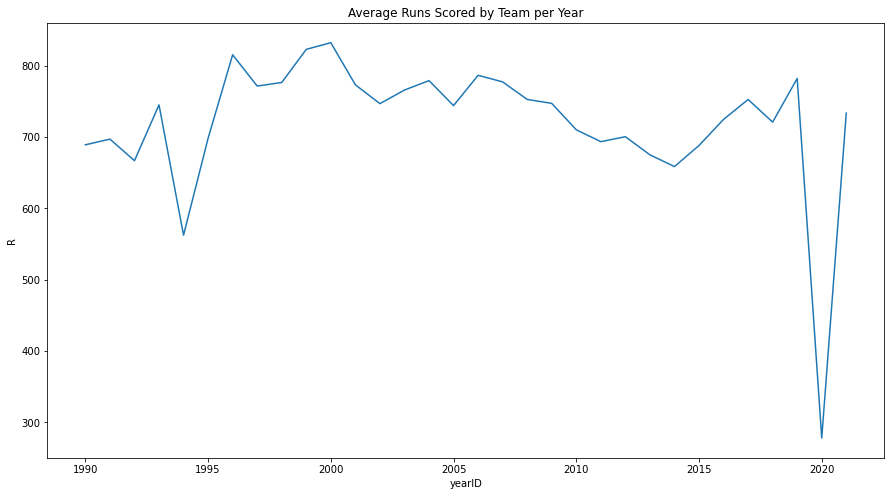

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = RunScoredPivot, x = "yearID", y = "R")
plt.title('Average Runs Scored by Team per Year')


In [ ]:
# Linear Regression to predict wins run diff and somthing else -- Scatter Plot
 #create correlation matrix for runs,RA, and run diff and wins

    

Text(0.5, 1.0, 'Correlation Matrix, Wins and Run Differential ')

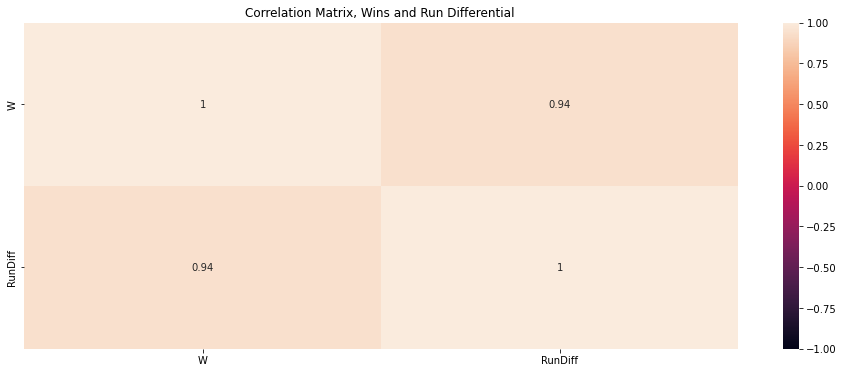

In [ ]:
#correlation matix 

wins_and_RDiff = sql("SELECT W, R - RA as RunDiff FROM teams WHERE (yearID between 1990 and 2021) and (yearID != 1994) and (yearID != 1995) and (yearID !=2020)")
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(wins_and_RDiff.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix, Wins and Run Differential ')

Text(0.5, 1.0, 'Wins vs. Run Differential')

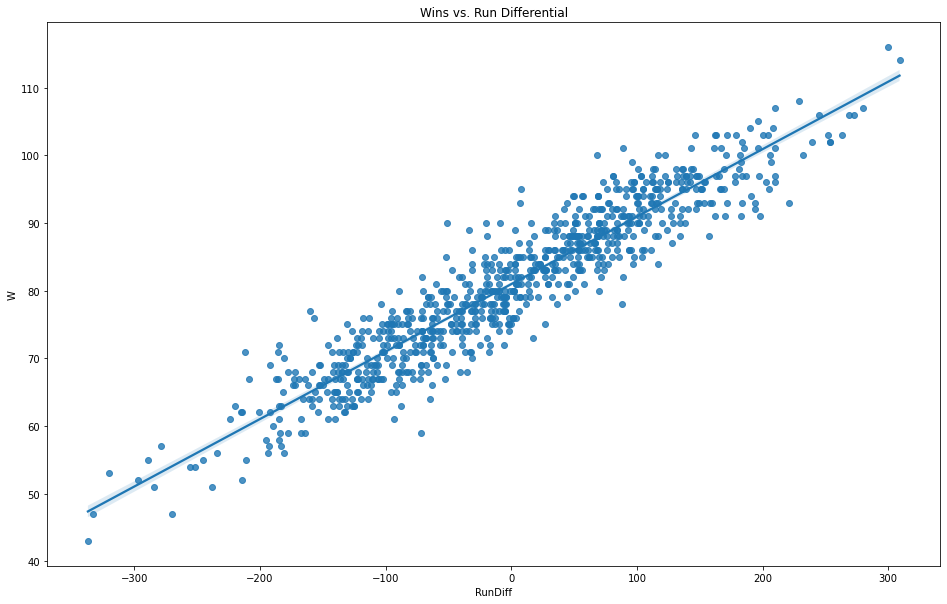

In [ ]:
plt.figure(figsize=(16, 10))
sns.regplot(data=wins_and_RDiff, x="RunDiff", y="W")  
plt.title('Wins vs. Run Differential')

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = wins_and_RDiff[['RunDiff']]
y = wins_and_RDiff[['W']]
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")


coefficient of determination: 0.8800952874345098


In [ ]:
#Predicting 
x_input = np.array([[169]])
y_pred = model.predict(x_input)
print(y_pred)


[[97.80801986]]


/Users/zacharyclarke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn import linear_model
import statsmodels.api as sm


x = wins_and_RDiff[['RunDiff']]
y = wins_and_RDiff[['W']]
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [80.96596244]
Coefficients: 
 [[0.09965714]]


In [ ]:
# Oakland athlectics Background

In [ ]:
# Oakland athlectics wins by season 
OaklandAs2002 = sql("select W,L,R,RA, R - RA as Run_Diff, DivWin, WSWin FROM teams where yearID = 2002 and franchID = 'OAK'") 
OaklandAs2002

,W,L,R,RA,Run_Diff,DivWin,WSWin
0,103,59,800,654,146,Y,N


## Machine Learning

In [ ]:
#Machine Learning tools 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#logistic regression
from sklearn.linear_model import LogisticRegression 

#Linear Support Vector Classification
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**Data Cleaning**

In [39]:
teams

,yearID,lgID,teamID,franchID,divID,G,W,L,DivWin,WSWin,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name
0,1990,NL,ATL,ATL,W,162,65,97,N,N,...,30,4289,1527,128,579,938,158,133,0.974,Atlanta Braves
1,1990,AL,BAL,BAL,E,161,76,85,N,N,...,43,4306,1445,161,537,776,93,151,0.985,Baltimore Orioles
2,1990,AL,BOS,BOS,E,162,88,74,Y,N,...,44,4326,1439,92,519,997,123,154,0.980,Boston Red Sox
3,1990,AL,CAL,ANA,W,162,80,82,N,N,...,42,4362,1482,106,544,944,142,186,0.978,California Angels
4,1990,AL,CHA,CHW,W,162,94,68,N,N,...,68,4348,1313,106,548,914,124,169,0.980,Chicago White Sox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,2021,NL,SLN,STL,C,162,90,72,N,N,...,50,4251,1234,152,608,1225,84,137,0.986,St. Louis Cardinals
934,2021,AL,TBA,TBD,E,162,100,62,Y,N,...,42,4367,1264,184,436,1478,80,130,0.986,Tampa Bay Rays
935,2021,AL,TEX,TEX,W,162,60,102,N,N,...,31,4273,1402,232,513,1239,83,146,0.986,Texas Rangers
936,2021,AL,TOR,TOR,E,162,91,71,N,N,...,34,4216,1257,209,473,1468,90,122,0.984,Toronto Blue Jays


In [40]:
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'G', 'W', 'L',
       'DivWin', 'WSWin', 'R', 'AB', 'H', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP',
       'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA',
       'BBA', 'SOA', 'E', 'DP', 'FP', 'name'],
      dtype='object')

In [41]:
#filter out for holdout years and covid season
teams = sql("SELECT * FROM teams where (yearID between 1990 and 2021) and (yearID != 1994) and (yearID != 1995) and yearID !=2020")
teams

,yearID,lgID,teamID,franchID,divID,G,W,L,DivWin,WSWin,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name
0,1990,NL,ATL,ATL,W,162,65,97,N,N,...,30,4289,1527,128,579,938,158,133,0.974,Atlanta Braves
1,1990,AL,BAL,BAL,E,161,76,85,N,N,...,43,4306,1445,161,537,776,93,151,0.985,Baltimore Orioles
2,1990,AL,BOS,BOS,E,162,88,74,Y,N,...,44,4326,1439,92,519,997,123,154,0.980,Boston Red Sox
3,1990,AL,CAL,ANA,W,162,80,82,N,N,...,42,4362,1482,106,544,944,142,186,0.978,California Angels
4,1990,AL,CHA,CHW,W,162,94,68,N,N,...,68,4348,1313,106,548,914,124,169,0.980,Chicago White Sox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2021,NL,SLN,STL,C,162,90,72,N,N,...,50,4251,1234,152,608,1225,84,137,0.986,St. Louis Cardinals
848,2021,AL,TBA,TBD,E,162,100,62,Y,N,...,42,4367,1264,184,436,1478,80,130,0.986,Tampa Bay Rays
849,2021,AL,TEX,TEX,W,162,60,102,N,N,...,31,4273,1402,232,513,1239,83,146,0.986,Texas Rangers
850,2021,AL,TOR,TOR,E,162,91,71,N,N,...,34,4216,1257,209,473,1468,90,122,0.984,Toronto Blue Jays


In [ ]:
# turn yes and no to 1 and 0 
teams['DivWin'] = teams['DivWin'].map({'Y': 1.0, 'N': 0.0})
teams['WSWin'] = teams['WSWin'].map({'Y': 1.0, 'N': 0.0})


# and turn null value into 0 
#wins_offense[['DivWin', 'WSWin']] = wins_offense[['DivWin','WSWin']].fillna(value=0)

In [ ]:
teams["H"] = teams["H"].astype(float)
teams["AB"] = teams["AB"].astype(float)
teams["HR"] = teams["HR"].astype(float)

In [ ]:
teams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1990,NL,ATL,ATL,W,6,162,81.0,65,97,...,133,0.974,Atlanta Braves,Atlanta-Fulton County Stadium,980129.0,105,106,ATL,ATL,ATL
1,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,151,0.985,Baltimore Orioles,Memorial Stadium,2415189.0,97,98,BAL,BAL,BAL
2,1990,AL,BOS,BOS,E,1,162,81.0,88,74,...,154,0.980,Boston Red Sox,Fenway Park II,2528986.0,105,105,BOS,BOS,BOS
3,1990,AL,CAL,ANA,W,4,162,81.0,80,82,...,186,0.978,California Angels,Anaheim Stadium,2555688.0,97,97,CAL,CAL,CAL
4,1990,AL,CHA,CHW,W,2,162,80.0,94,68,...,169,0.980,Chicago White Sox,Comiskey Park,2002357.0,98,98,CHW,CHA,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2021,NL,SLN,STL,C,2,162,81.0,90,72,...,137,0.986,St. Louis Cardinals,Busch Stadium III,2102530.0,92,92,STL,SLN,SLN
848,2021,AL,TBA,TBD,E,1,162,81.0,100,62,...,130,0.986,Tampa Bay Rays,Tropicana Field,761072.0,92,91,TBR,TBA,TBA
849,2021,AL,TEX,TEX,W,5,162,81.0,60,102,...,146,0.986,Texas Rangers,Globe Life Field,2110258.0,99,101,TEX,TEX,TEX
850,2021,AL,TOR,TOR,E,4,162,80.0,91,71,...,122,0.984,Toronto Blue Jays,Sahlen Field,805901.0,102,101,TOR,TOR,TOR


In [ ]:
#select columns that are needed 
wins_offense = sql("SELECT DivWin, WSWin, W,  H / AB as Bavg, R, HR / H as HRperHit, HR, BB, SO, SB, yearID, teamID from teams")
wins_defense = sql("SELECT DivWin, WSWin, W, ERA, RA, HA, HRA, BBA, SOA, E, DP, FP, yearID, teamID FROM teams")

In [ ]:
wins_offense

,DivWin,WSWin,W,Bavg,R,HRperHit,HR,BB,SO,SB,yearID,teamID
0,0.0,0.0,65,0.250000,682,0.117733,162.0,473.0,1010.0,92.0,1990,ATL
1,0.0,0.0,76,0.245471,669,0.099398,132.0,660.0,962.0,94.0,1990,BAL
2,1.0,0.0,88,0.272299,699,0.070573,106.0,598.0,795.0,53.0,1990,BOS
3,0.0,0.0,80,0.259964,690,0.101519,147.0,566.0,1000.0,69.0,1990,CAL
4,0.0,0.0,94,0.257867,682,0.076095,106.0,478.0,903.0,140.0,1990,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...
847,0.0,0.0,90,0.243506,706,0.151957,198.0,478.0,1341.0,89.0,2021,SLN
848,1.0,0.0,100,0.242600,857,0.166168,222.0,585.0,1542.0,88.0,2021,TBA
849,0.0,0.0,60,0.232007,625,0.133174,167.0,433.0,1381.0,106.0,2021,TEX
850,0.0,0.0,91,0.265705,846,0.180069,262.0,496.0,1218.0,81.0,2021,TOR


In [ ]:
wins_defense

,DivWin,WSWin,W,ERA,RA,HA,HRA,BBA,SOA,E,DP,FP,yearID,teamID
0,0.0,0.0,65,4.58,821,1527,128,579,938,158,133,0.974,1990,ATL
1,0.0,0.0,76,4.04,698,1445,161,537,776,93,151,0.985,1990,BAL
2,1.0,0.0,88,3.72,664,1439,92,519,997,123,154,0.980,1990,BOS
3,0.0,0.0,80,3.79,706,1482,106,544,944,142,186,0.978,1990,CAL
4,0.0,0.0,94,3.61,633,1313,106,548,914,124,169,0.980,1990,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0.0,0.0,90,3.98,672,1234,152,608,1225,84,137,0.986,2021,SLN
848,1.0,0.0,100,3.67,651,1264,184,436,1478,80,130,0.986,2021,TBA
849,0.0,0.0,60,4.79,815,1402,232,513,1239,83,146,0.986,2021,TEX
850,0.0,0.0,91,3.91,663,1257,209,473,1468,90,122,0.984,2021,TOR


**Correlation Matrix**

*Offense*

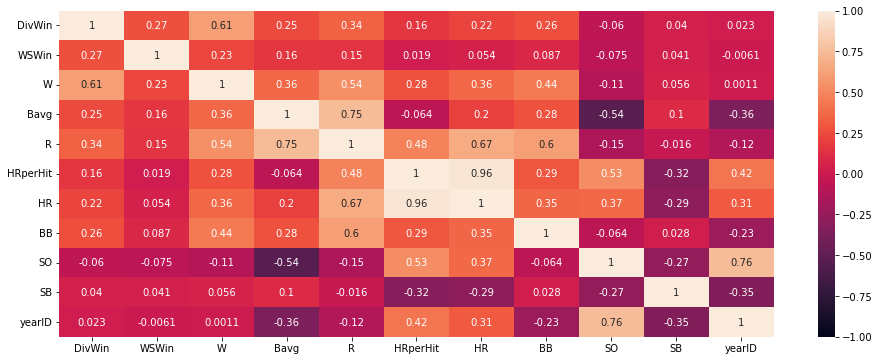

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(wins_offense.corr(), vmin=-1, vmax=1, annot=True)

*Defense*

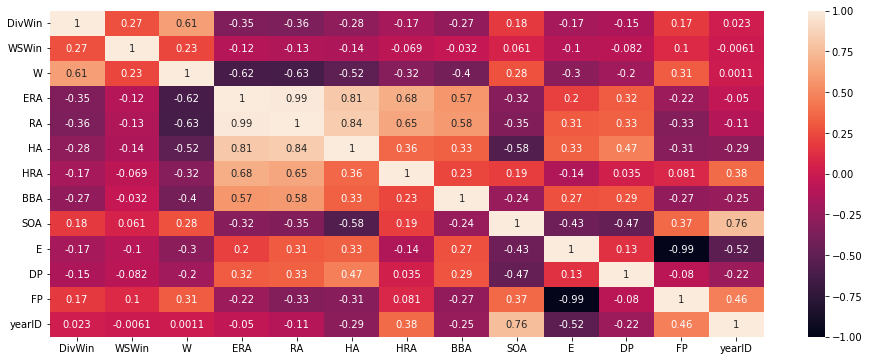

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(wins_defense.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
# inputs W, Bavg, HRperHit, BB, ERA
# output 1 DivWin 
# output 2 WSWin 

In [ ]:
features_and_target_DivWin = sql("select DivWin, H/AB as Bavg, HR / H as HRperHit, BB, ERA FROM teams")

In [ ]:
features_and_target_WsWin =  sql("select WSWin, H/AB as Bavg, HR / H as HRperHit, BB, ERA FROM teams")

*Divison Winners Model*

In [ ]:
features_and_target_DivWin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DivWin    852 non-null    float64
 1   Bavg      852 non-null    float64
 2   HRperHit  852 non-null    float64
 3   BB        852 non-null    float64
 4   ERA       852 non-null    float64
dtypes: float64(5)
memory usage: 33.4 KB


In [ ]:
features_and_target_DivWin.isnull().sum()

DivWin      0
Bavg        0
HRperHit    0
BB          0
ERA         0
dtype: int64

In [ ]:
train, test = train_test_split(features_and_target_DivWin, test_size = 0.2)

In [ ]:
# the training features are these columns
train_feat = train[['Bavg', 'HRperHit', 'BB', 'ERA']]
# the 'outcome' column is DivWin
train_targ = train['DivWin']

In [ ]:
test_feat = test[['Bavg', 'HRperHit', 'BB', 'ERA']]
test_targ = test['DivWin']

**Logistic Regression** - Division Winners 

In [ ]:
lr=LogisticRegression(max_iter=100000)

In [ ]:
lr.fit(train_feat, train_targ)

LogisticRegression(max_iter=100000)

In [ ]:
lr.score(train_feat, train_targ)

0.8223201174743024

In [ ]:
lr.score(test_feat, test_targ)

0.8421052631578947

In [ ]:
confusion_matrix(lr.predict(test_feat),test_targ)

array([[139,  26],
       [  1,   5]])

In [ ]:
#team
OakAs2002 = sql("select H/AB as Bavg, HR/H as HRperHit,BB,ERA FROM teams where yearID = 2002 and franchID = 'OAK'") 
OakAs2002


,Bavg,HRperHit,BB,ERA
0,0.260885,0.141379,609.0,3.68


In [ ]:
#prediction
Divison_Winner_Prediction_lr = lr.predict(OakAs2002)

if Divison_Winner_Prediction_lr == 1: 
    print("Predicted Division Winners") 
else: 
    print("Predicted to Not Win Division")


Predicted Division Winners


In [ ]:
TXRanger2015 = sql("select H/AB as Bavg, HR/H as HRperHit,BB,ERA FROM teams where yearID = 2015 and franchID = 'TEX'")
TXRanger2015



,Bavg,HRperHit,BB,ERA
0,0.257485,0.121212,503.0,4.24


In [ ]:
Divison_Winner_Prediction_2 = lr.predict(TXRanger2015)

if Divison_Winner_Prediction_2 == 1: 
    print("Predicted Division Winners") 
else: 
    print("Predicted to Not Win Division")

Predicted to Not Win Division


**Linear Support Vector Classification** - Division Winners

In [ ]:
svm=LinearSVC(max_iter=100000)
svm.fit(train_feat, train_targ) 
svm.score(train_feat, train_targ)

/Users/zacharyclarke/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4067547723935389

In [ ]:
confusion_matrix(svm.predict(test_feat),test_targ)

array([[ 36,   1],
       [104,  30]])

In [ ]:
# predicited values
Divison_Winner_Prediction_svm = svm.predict(OakAs2002)

if Divison_Winner_Prediction_svm == 1: 
    print("Predicted Division Winners") 
else: 
    print("Predicted to Not Win Division")

Predicted Division Winners


In [ ]:
#other better team 

**Decision Tree Classifier** - Division Winners

In [ ]:
dt=DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

dt.fit(train_feat, train_targ) 

dt.score(train_feat, train_targ)

0.8252569750367107

In [ ]:
confusion_matrix(dt.predict(test_feat),test_targ)

array([[123,  20],
       [ 17,  11]])

In [ ]:
Divison_Winner_Prediction_dt = dt.predict(OakAs2002)

if Divison_Winner_Prediction_dt == 1: 
    print("Predicted Division Winners") 
else: 
    print("Predicted to Not Win Division")

Predicted Division Winners


In [ ]:
# Other better team 

*World Series Model*

In [ ]:
train_ws, test_ws = train_test_split(features_and_target_WsWin, test_size = 0.2)

In [ ]:
train_feat_ws = train_ws[['Bavg', 'HRperHit', 'BB', 'ERA']]
train_targ_ws = train_ws['WSWin']
test_feat_ws = test_ws[['Bavg', 'HRperHit', 'BB', 'ERA']]
test_targ_ws = test_ws['WSWin']


**Logistic Regression** - World Series Winners

In [ ]:
lr_ws = LogisticRegression(max_iter=100000)

In [ ]:
lr_ws.fit(train_feat_ws, train_targ_ws)

LogisticRegression(max_iter=100000)

In [ ]:
lr_ws.score(train_feat_ws, train_targ_ws)

0.9662261380323054

In [ ]:
lr_ws.score(test_feat_ws, test_targ_ws)

0.9649122807017544

In [ ]:
confusion_matrix(lr_ws.predict(test_feat_ws),test_targ_ws)

NameError: name 'confusion_matrix' is not defined

In [ ]:
World_Series_Winner_Prediction = lr_ws.predict(OakAs2002)

if World_Series_Winner_Prediction == 1: 
    print("Predicted World Series Winners") 
else: 
    print("Predicted Not to Win World Series")

Predicted Not to Win World Series
